<a href="https://colab.research.google.com/github/wassima-manssour/MNIST-Digit-Classification/blob/main/Model1_DigitClassif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing Librairies**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

## **Loading the Dataset** 

The dataset we're using is the MNIST digits calssification dataset, you can find [here](https://keras.io/api/datasets/mnist/).

In [ ]:
# get the data & split it to training & test datasets
(train_imgs,train_labels),(test_imgs,test_labels) = mnist.load_data()

In [ ]:
type(train_imgs)

numpy.ndarray

In [ ]:
# shape of the numpy arry
print(f"Training data:{train_imgs.shape}\nTesting data{test_imgs.shape},\nTraing labels:{train_labels.shape},\nTest labels:{test_labels.shape}")

Training data:(60000, 28, 28)
Testing data(10000, 28, 28),
Traing labels:(60000,),
Test labels:(10000,)


In [ ]:
# print the 3thd image
print(train_imgs[3])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  124 253 255  63   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  96
  244 251 253  62   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 127
  251 251 253  62   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

In [ ]:
print(f"Images dimension: {train_imgs[3].shape}")

Images dimension: (28, 28)


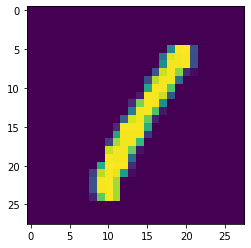

1


In [ ]:
# displaying the image
plt.imshow(train_imgs[3])
plt.show()

# print the corresponding label
print(train_labels[3])

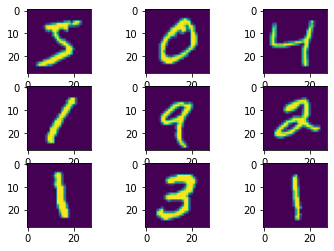

In [ ]:
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(train_imgs[i])
 
# show the figure
plt.show()

In [ ]:
# unique values in train_labels
print(np.unique(train_labels))

# unique values in test_labels
print(np.unique(test_labels))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]




> Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric. So we have to Convert Categorical Data (labels) to Numerical Data. Read more [here](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/).








> All the images have the same dimensions in this dataset, If not, we have to resize all the images to a common dimension.



In [ ]:
# scale down the values of the pixels from 0-255 to 0-1
train_imgs = train_imgs/255
test_imgs = test_imgs/255

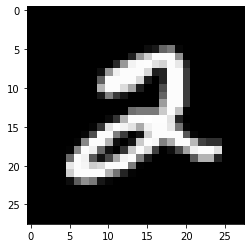

In [ ]:
# plot first few images
plt.imshow(train_imgs[5],cmap='gray')

In [ ]:
print(train_imgs[5])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

## **Building the Neural Network** 

In [ ]:
# Define the layers of the NN
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)), #fmattening layer: convert the img matrix to a single dimension array
                          keras.layers.Dense(50, activation='relu'), # 32 64 128 256... multiple of 8 prefered: smaller the number faster the code & less chance of overfitting
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid') # 10 neurons: number of the classes(labels) for classification  we have
])


In [ ]:
'''
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
                          #keras.layers.Dense(10, activation='softmax') # 10 neurons: number of the classes(labels) for classification  we have

])
'''

"\nmodel = keras.Sequential([\n                          keras.layers.Flatten(input_shape=(28,28)),\n                          keras.layers.Dense(50, activation='relu'),\n                          keras.layers.Dense(50, activation='relu'),\n                          keras.layers.Dense(10, activation='sigmoid')\n                          #keras.layers.Dense(10, activation='softmax') # 10 neurons: number of the classes(labels) for classification  we have\n\n])\n"

In [ ]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy', # must change if we converted the categorical data (one hot encoding..)
              metrics=['accuracy'])

In [ ]:
# training the Neural Network

model.fit(train_imgs, train_labels, epochs=4)

Epoch 1/4
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2938 - accuracy: 0.9149
Epoch 2/4
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1373 - accuracy: 0.9595
Epoch 3/4
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1015 - accuracy: 0.9697
Epoch 4/4
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0820 - accuracy: 0.9744


In [ ]:
loss, accuracy = model.evaluate(test_imgs, test_labels)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1074 - accuracy: 0.9647
0.9646999835968018


*Save the Model*

In [ ]:
model.save('mnist_digit_classification')

In [ ]:
# load the model from the file system
new_model = keras.models.load_model('mnist_digit_classification')

In [ ]:
# check if the new model gives the same accuracy on the test data
new_loss,new_accuracy = new_model.evaluate(test_imgs,test_labels)
print(f'New accuracy: {new_accuracy}')

313/313 [==============================] - 1s 2ms/step - loss: 0.1074 - accuracy: 0.9647
New accuracy: 0.9646999835968018


**Test the model on a single digit**

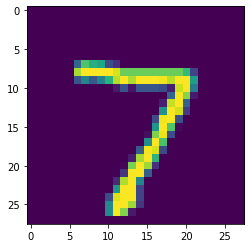

7


In [ ]:
# first data point in X_test
plt.imshow(test_imgs[0])
plt.show()
print(test_labels[0])

In [ ]:
Y_pred = model.predict(test_imgs)

313/313 [==============================] - 1s 2ms/step


In [ ]:
print(Y_pred.shape)

(10000, 10)




> model.predict() gives the prediction probability of each class for that data point.
*Y_test* --> True labels. And
*Y_pred_labels* --> Predicted Labels.



In [ ]:
print(Y_pred[0])

[1.1869690e-03 5.3117825e-03 2.2149219e-01 9.7926342e-01 2.8856837e-06
 2.5022876e-01 1.4258586e-08 9.9975967e-01 3.6524057e-01 7.5921617e-02]


In [ ]:
# converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [ ]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 5, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 3, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 3, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 3, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 5, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

**Confusion Matrix**

In [ ]:
conf_matrix = confusion_matrix(test_labels, Y_pred_labels)

In [ ]:
print(conf_matrix)

tf.Tensor(
[[ 965    0    2    2    0    5    4    1    1    0]
 [   0 1123    3    2    0    1    2    0    4    0]
 [   4    2  968   22    2    2    3   11   18    0]
 [   0    0    0  979    0   24    0    3    4    0]
 [   1    2    2    0  950    1    7    3    1   15]
 [   2    0    0    5    1  877    4    0    3    0]
 [   6    3    0    1    3   14  924    0    7    0]
 [   1    7    3   14    0    3    1  983    8    8]
 [   2    0    2   21    2   10    1    2  931    3]
 [   2    4    0   14    9   17    0    9    7  947]], shape=(10, 10), dtype=int32)


Text(0.5, 42.0, 'Predicted Labels')

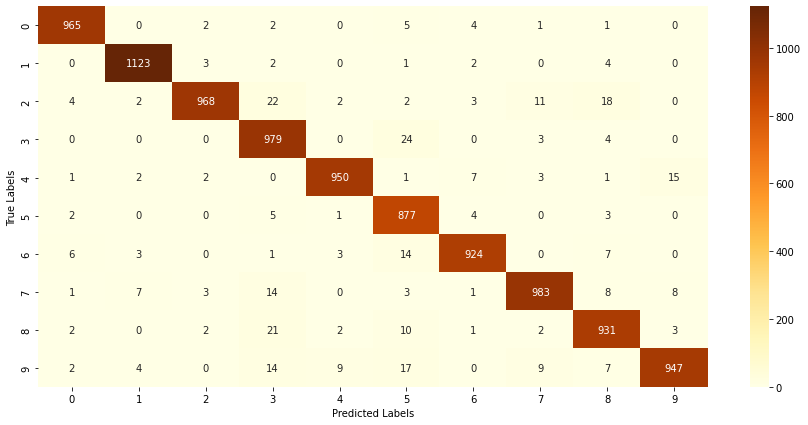

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlOrBr')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')



*   970 imgs were predicted as 0, with true lebel 0
*   0 imgs were predicted as 1, with true lebel 0
* 3 imgs were predicted as 6, with true lebel 0



## **Building a Predictive System**

In [ ]:
input_image_path = '/content/digit_six.png'

input_image = cv2.imread(input_image_path)

In [ ]:
type(input_image)

numpy.ndarray

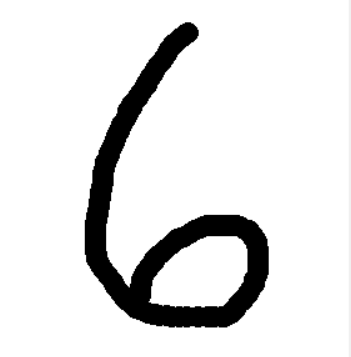

In [ ]:
cv2_imshow(input_image)

In [ ]:
input_image.shape

(357, 351, 3)

In [ ]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [ ]:
grayscale.shape

(357, 351)

In [ ]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [ ]:
input_image_resize.shape

(28, 28)

In [ ]:
cv2_imshow(input_image_resize)

In [ ]:
input_image_resize = input_image_resize/255

In [ ]:
image_reshaped = np.reshape(input_image_resize, [1,28,28]) # predicting 1 img with shape 28 28

In [ ]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 43ms/step
[[3.0579584e-04 1.8449742e-04 9.9853259e-01 1.0226637e-02 8.6845852e-13
  9.9987847e-01 1.8112763e-05 9.9951601e-01 5.6187898e-01 3.2667975e-07]]


In [ ]:
input_pred_label = np.argmax(input_prediction)

In [ ]:
print(input_pred_label)

5


**Predictive system**

Path of the image to be predicted:/content/digit_one.png


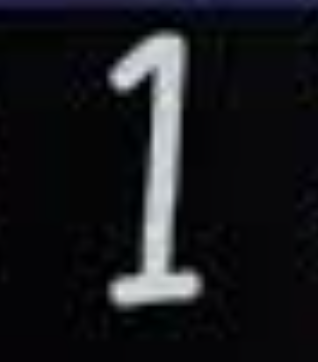

1/1 [==============================] - 0s 19ms/step
The Handwritten Digit is recognised as  1


In [ ]:
input_image_path = input('Path of the image to be predicted:')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)